# Análisis exploratorio de datos

Contentesta las siguientes preguntas escribiendo el código de Python necesario para encontrar las respuestas o producir las gráficas necesarias

---


In [1]:
# No mostrar advertencias
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

### 1. ¿Cuál es la distribución de edades de los clientes?
- **Objetivo**: Comprender la distribución de las edades en el conjunto de datos.
- **Respuesta esperada**: Un histograma de la columna Age.

In [11]:
df = pd.read_csv('data/retailmax.csv')

df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


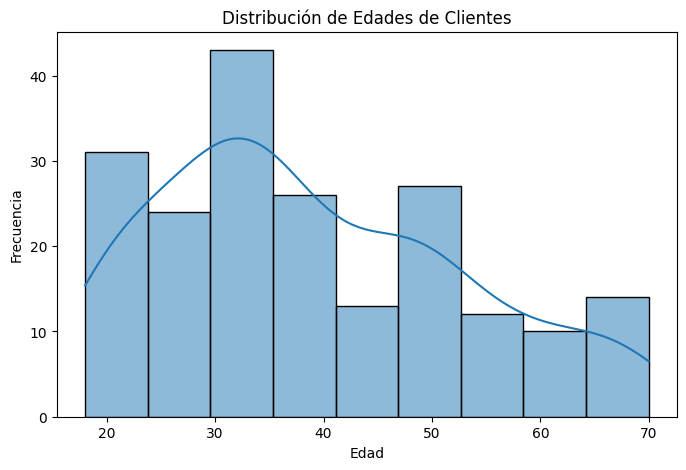

In [12]:
# tu código aquí


plt.figure(figsize=(8, 5))
sns.histplot(df['Age'], kde=True)
plt.title("Distribución de Edades de Clientes")
plt.xlabel("Edad")
plt.ylabel("Frecuencia")
plt.show()


### 2. ¿Existen diferencias significativas en los ingresos anuales entre hombres y mujeres?
- **Objetivo**: Comparar la distribución de ingresos anuales entre géneros.
- **Respuesta esperada**: Una gráfica de cajas (boxplot) que muestre la distribución de Annual Income (k$) por género.

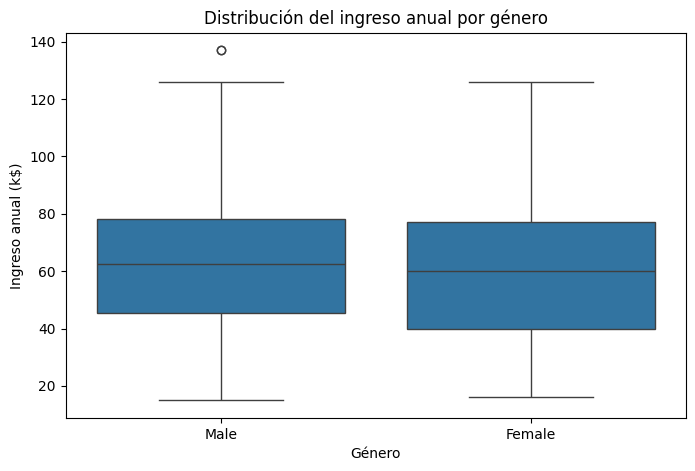

In [19]:
plt.figure(figsize=(8, 5))

sns.boxplot(
    data=df,
    x='Gender',
    y='Annual Income (k$)',
    order=['Male', 'Female']   # opcional
)

plt.title("Distribución del ingreso anual por género")
plt.xlabel("Género")
plt.ylabel("Ingreso anual (k$)")

plt.show()



### 3. ¿Cómo se distribuye la puntuación de gasto (Spending Score) entre los diferentes rangos de edad?
- **Objetivo**: Analizar la relación entre la edad y la puntuación de gasto.
- **Respuesta esperada**: Una gráfica de dispersión (scatter plot) o un gráfico de cajas que compare la Spending Score (1-100) con diferentes grupos de edad.

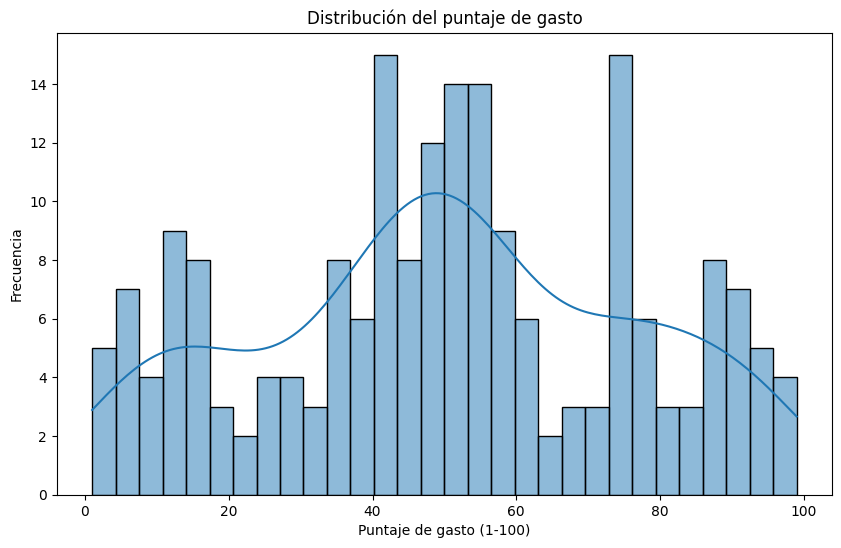

In [20]:
# tu código aquí
plt.figure(figsize=(10, 6))
sns.histplot(df['Spending Score (1-100)'], bins=30, kde=True)

plt.title("Distribución del puntaje de gasto")
plt.xlabel("Puntaje de gasto (1-100)")
plt.ylabel("Frecuencia")

plt.show()

### 4. ¿Cuál es la correlación entre el ingreso anual y la puntuación de gasto?
- **Objetivo**: Identificar si existe una relación lineal entre el ingreso y el gasto.
- **Respuesta esperada**: Una gráfica de dispersión y el cálculo del coeficiente de correlación entre Annual Income (k$) y Spending Score (1-100).

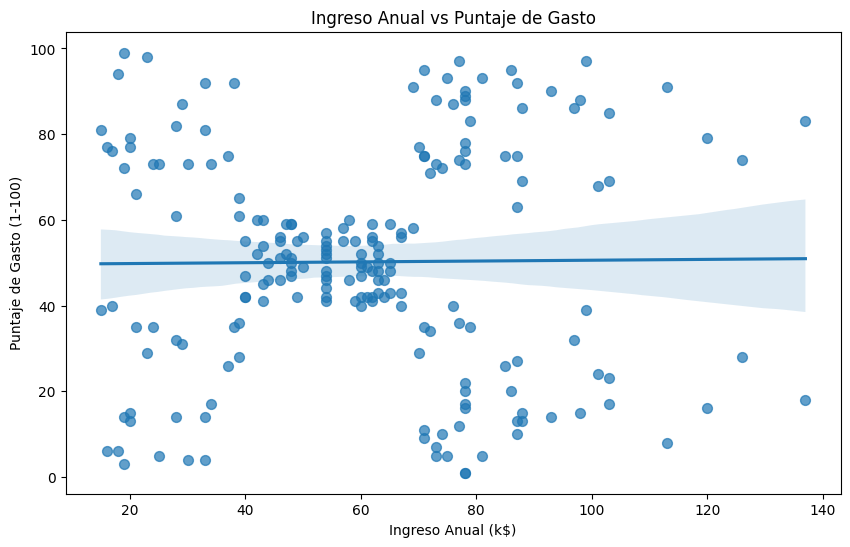

np.float64(0.009902848094037606)

In [24]:
# tu código aquí
plt.figure(figsize=(10, 6))
sns.regplot(
    data=df,
    x='Annual Income (k$)',
    y='Spending Score (1-100)',
    scatter_kws={'s': 50, 'alpha': 0.7}
)
plt.title("Ingreso Anual vs Puntaje de Gasto")
plt.xlabel("Ingreso Anual (k$)")
plt.ylabel("Puntaje de Gasto (1-100)")
plt.show()

correlation = df['Annual Income (k$)'].corr(df['Spending Score (1-100)'])
correlation

### 5. ¿Cómo varía la puntuación de gasto en diferentes grupos de ingresos anuales?
- **Objetivo**: Examinar cómo los clientes en diferentes rangos de ingresos se comportan en términos de gasto.
- **Respuesta esperada**: Una gráfica de cajas o de violín que muestre la Spending Score (1-100) para diferentes rangos de Annual Income (k$).

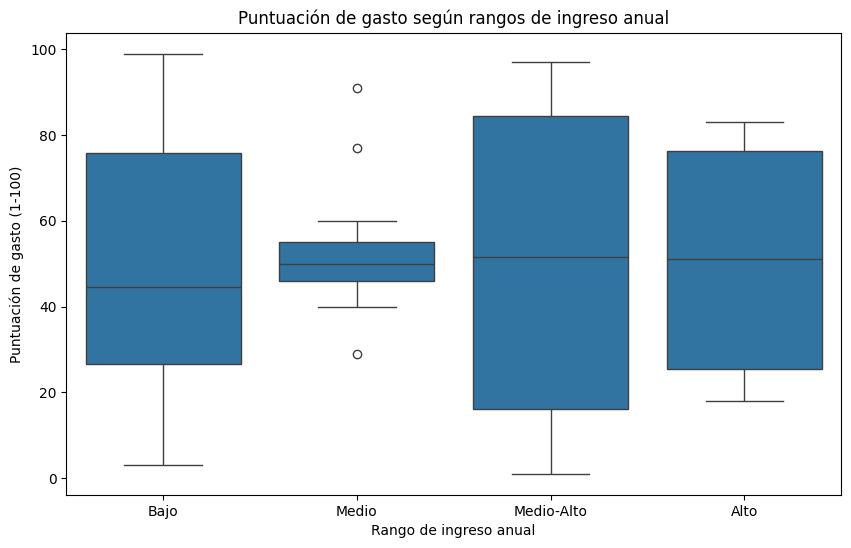

In [25]:
# tu código aquí
df['IncomeGroup'] = pd.cut(
    df['Annual Income (k$)'],
    bins=[0, 40, 70, 120, 200],
    labels=['Bajo', 'Medio', 'Medio-Alto', 'Alto']
)

plt.figure(figsize=(10, 6))

sns.boxplot(
    data=df,
    x='IncomeGroup',
    y='Spending Score (1-100)',
    order=['Bajo', 'Medio', 'Medio-Alto', 'Alto']
)

plt.title("Puntuación de gasto según rangos de ingreso anual")
plt.xlabel("Rango de ingreso anual")
plt.ylabel("Puntuación de gasto (1-100)")
plt.show()


### 6. ¿Cuál es la proporción de clientes por género?
- **Objetivo**: Determinar el balance de género en el conjunto de datos.
- **Respuesta esperada**: Una gráfica de barras o un gráfico de pastel que muestre la proporción de hombres y mujeres.

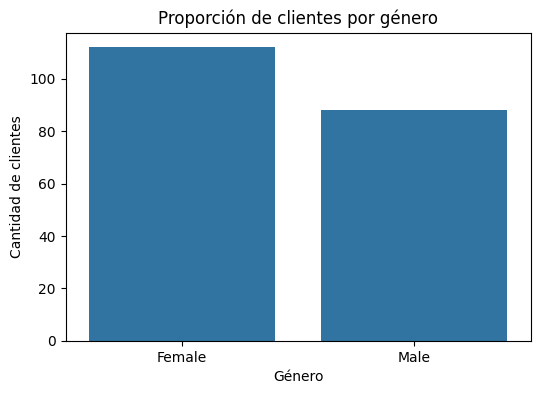

In [26]:
# tu código aquí
gender_counts = df['Gender'].value_counts()

plt.figure(figsize=(6, 4))
sns.barplot(
    x=gender_counts.index,
    y=gender_counts.values
)

plt.title("Proporción de clientes por género")
plt.xlabel("Género")
plt.ylabel("Cantidad de clientes")
plt.show()


### 7. ¿Qué grupos de edad gastan más en promedio?
- **Objetivo**: Identificar los grupos de edad que tienen una mayor puntuación de gasto en promedio.
- **Respuesta esperada**: Una gráfica de barras que compare la puntuación de gasto promedio entre diferentes grupos de edad.

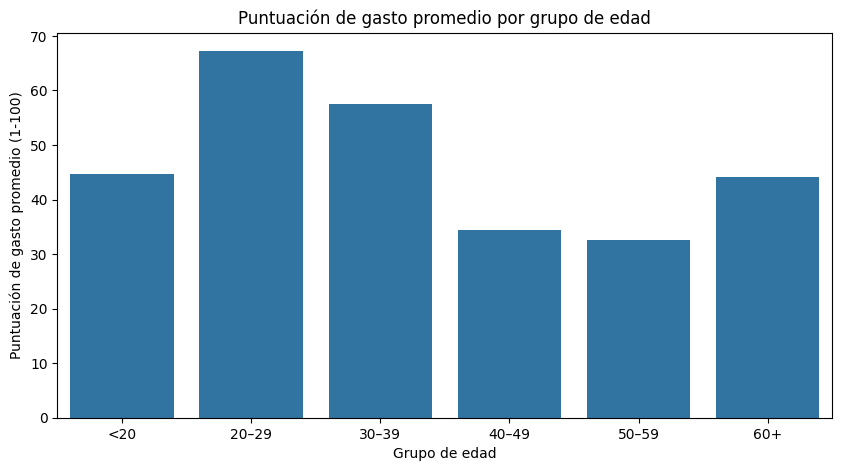

In [27]:
# tu código aquí
df['AgeGroup'] = pd.cut(
    df['Age'],
    bins=[0, 20, 30, 40, 50, 60, 100],
    labels=['<20', '20–29', '30–39', '40–49', '50–59', '60+']
)

age_spending_avg = df.groupby('AgeGroup')['Spending Score (1-100)'].mean().reset_index()

plt.figure(figsize=(10, 5))

sns.barplot(
    data=age_spending_avg,
    x='AgeGroup',
    y='Spending Score (1-100)',
    order=['<20', '20–29', '30–39', '40–49', '50–59', '60+']
)

plt.title("Puntuación de gasto promedio por grupo de edad")
plt.xlabel("Grupo de edad")
plt.ylabel("Puntuación de gasto promedio (1-100)")

plt.show()



### 8. ¿Hay alguna relación entre la edad y el ingreso anual de los clientes?
- **Objetivo**: Explorar si hay una tendencia entre la edad de los clientes y sus ingresos.
- **Respuesta esperada**: Una gráfica de dispersión que muestre la relación entre Age y Annual Income (k$).

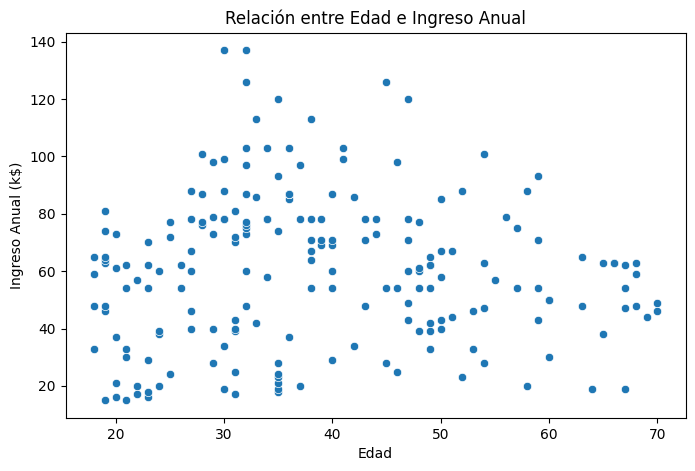

In [28]:
# tu código aquí
plt.figure(figsize=(8, 5))

sns.scatterplot(
    data=df,
    x='Age',
    y='Annual Income (k$)'
)

plt.title("Relación entre Edad e Ingreso Anual")
plt.xlabel("Edad")
plt.ylabel("Ingreso Anual (k$)")

plt.show()


### 9. ¿Cuál es la distribución conjunta de la edad y el ingreso anual?
- **Objetivo**: Entender cómo se distribuyen estas dos variables en conjunto.
- **Respuesta esperada**: Una gráfica de dispersión con una densidad de puntos o un gráfico de hexágonos que muestre la distribución conjunta de Age y Annual Income (k$).

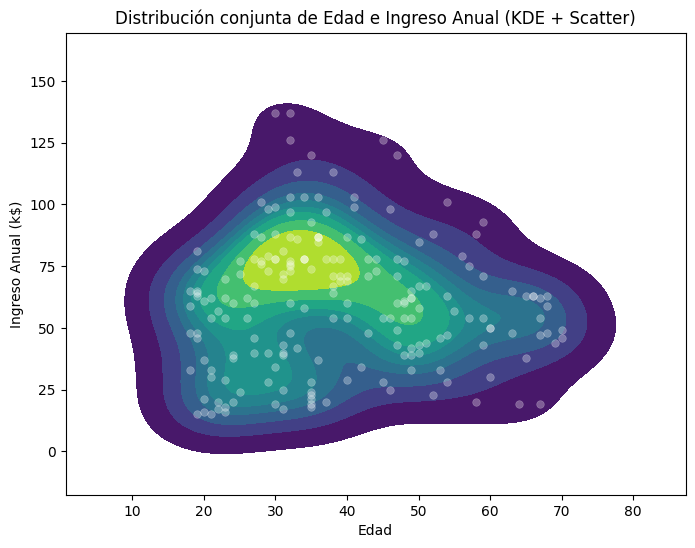

In [29]:
# tu código aquí
plt.figure(figsize=(8, 6))

sns.kdeplot(
    data=df,
    x='Age',
    y='Annual Income (k$)',
    fill=True,
    cmap='viridis',
    thresh=0.05
)

sns.scatterplot(
    data=df,
    x='Age',
    y='Annual Income (k$)',
    color='white',
    alpha=0.3,
    s=30
)

plt.title("Distribución conjunta de Edad e Ingreso Anual (KDE + Scatter)")
plt.xlabel("Edad")
plt.ylabel("Ingreso Anual (k$)")
plt.show()


### 10. ¿Cómo se distribuyen los clientes en función de la puntuación de gasto y el género?
- **Objetivo**: Analizar la relación entre la puntuación de gasto y el género.
- **Respuesta esperada**: Una gráfica de dispersión o un gráfico de violín que muestre la Spending Score (1-100) separada por género.

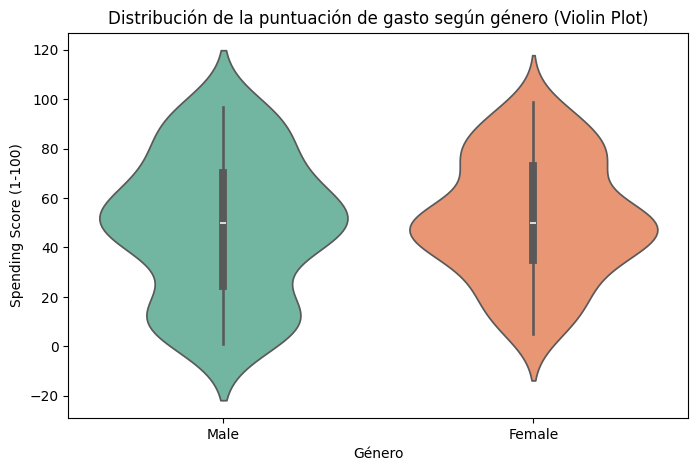

In [31]:
plt.figure(figsize=(8, 5))

sns.violinplot(
    data=df,
    x='Gender',
    y='Spending Score (1-100)',
    palette='Set2'
)

plt.title("Distribución de la puntuación de gasto según género (Violin Plot)")
plt.xlabel("Género")
plt.ylabel("Spending Score (1-100)")
plt.show()
